# Imports

In [ ]:
from google.colab import files
import numpy as np 
import matplotlib.pyplot as plt 
import csv
import pandas as pd

In [ ]:
pip install duckdb==0.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.4 MB 5.1 MB/s 


In [ ]:
import duckdb

# Upload all files

In [ ]:
!rm bench_zipf_approach_128M.csv
zipf = files.upload()

rm: cannot remove 'bench_zipf_approach_128M.csv': No such file or directory


Saving bench_zipf_approach_128M.csv to bench_zipf_approach_128M.csv


In [ ]:
!rm bench_key_length_approach_128M.csv
key_len = files.upload()

rm: cannot remove 'bench_key_length_approach_128M.csv': No such file or directory


Saving bench_key_length_approach_128M.csv to bench_key_length_approach_128M.csv


In [ ]:
!rm bench_threads_approach_128M.csv
threads = files.upload()

rm: cannot remove 'bench_threads_approach_128M.csv': No such file or directory


Saving bench_threads_approach_128M.csv to bench_threads_approach_128M.csv


In [ ]:
!rm bench_strings_approach.csv
strings = files.upload()

rm: cannot remove 'bench_strings_approach.csv': No such file or directory


Saving bench_strings_approach.csv to bench_strings_approach.csv


In [ ]:
!rm bench_old_new.csv
old_new = files.upload()

Saving bench_old_new.csv to bench_old_new.csv


In [ ]:
!rm zipf_stats.csv
zipf_stats = files.upload()

rm: cannot remove 'zipf_stats.csv': No such file or directory


Saving zipf_stats.csv to zipf_stats.csv


# Create tables

In [ ]:
con = duckdb.connect(database=':memory:')

In [ ]:
# ZIPF
# approach, param, mean, median, std
con.execute("CREATE TABLE bench_zipf AS SELECT * FROM 'bench_zipf_approach_128M.csv';")

In [ ]:
# KEY LENGTH
# approach, length, sorted, mean, median, std
con.execute("CREATE TABLE bench_key_length AS SELECT * FROM 'bench_key_length_approach_128M.csv';")

In [ ]:
# THREADS
# approach, type, num_threads, mean, median, std
con.execute("CREATE TABLE bench_threads AS SELECT * FROM 'bench_threads_approach_128M.csv';")

In [ ]:
# STRINGS
# approach, type, mean, median, std
con.execute("CREATE TABLE bench_strings AS SELECT * FROM 'bench_strings_approach.csv';")

In [ ]:
# # name, type, mean, median, std
# con.execute("CREATE TABLE bench_old_new AS SELECT * FROM 'bench_old_new.csv';")

# .fetchall() returns all rows of the table as ARRAY[(ROW1)], (ROW2), ...]

In [ ]:
# zipf statistics
con.execute("CREATE TABLE zipf_stats AS SELECT * FROM 'zipf_stats.csv';")

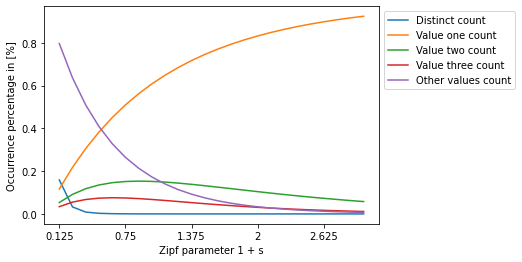

In [ ]:
con.execute("SELECT distinct_perc, num_ones_perc, num_twos_perc, num_threes_perc, num_others_perc FROM zipf_stats;")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row)

group_labels = ["0.125", "0.25", "0.375", "0.5", "0.625", "0.75", "0.875", "1", "1.125", "1.25", "1.375", "1.5", "1.625", "1.75", "1.875", "2", "2.125", "2.25", "2.375", "2.5", "2.625", "2.75", "2.875", "3"]

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Distinct count", 1: "Value one count", 2: "Value two count", 3: "Value three count", 4: "Other values count"})

# title='Value distribution percentage for the different Zipf parameters'
ax = df.plot(y=[0, 1, 2, 3, 4])
ax.set_xlabel("Zipf parameter 1 + s")
ax.set_ylabel("Occurrence percentage in [%]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Plot the zipf benchmarks

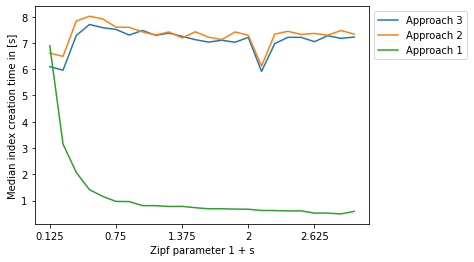

In [ ]:
# zipf
con.execute("SELECT LIST(median) FROM bench_zipf GROUP BY zipf_parameter;")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row[0])

group_labels = ["0.125", "0.25", "0.375", "0.5", "0.625", "0.75", "0.875", "1", "1.125", "1.25", "1.375", "1.5", "1.625", "1.75", "1.875", "2", "2.125", "2.25", "2.375", "2.5", "2.625", "2.75", "2.875", "3"]

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 3", 1: "Approach 2", 2: "Approach 1"})

# title='Median index creation time for different zipf parameters, 128M 64bit integer keys'
ax = df.plot(y=[0, 1, 2])
ax.set_xlabel("Zipf parameter 1 + s")
ax.set_ylabel("Median index creation time in [s]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Plot the key length benchmarks

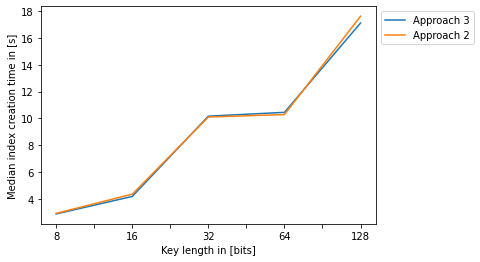

In [ ]:
# key length
con.execute("SELECT LIST(median) FROM bench_key_length WHERE sorted = 0 AND approach != 3 GROUP BY length;")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row[0])

group_labels = ['8', '16', '32', '64', '128']

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 3", 1: "Approach 2"})

# , title='Median index creation time for different integer types on uniform data, 128M keys'
ax = df.plot(y=[0, 1])
ax.set_xlabel("Key length in [bits]")
ax.set_ylabel("Median index creation time in [s]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

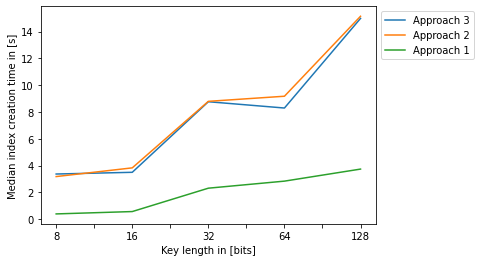

In [ ]:
# key length
con.execute("SELECT LIST(median) FROM bench_key_length WHERE sorted = 1 GROUP BY length;")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row[0])

group_labels = ['8', '16', '32', '64', '128']

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 3", 1: "Approach 2", 2: "Approach 1"})

# , title='Median index creation time for different integer types on uniform sorted data, 128M keys'
ax = df.plot(y=[0, 1, 2])
ax.set_xlabel("Key length in [bits]")
ax.set_ylabel("Median index creation time in [s]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

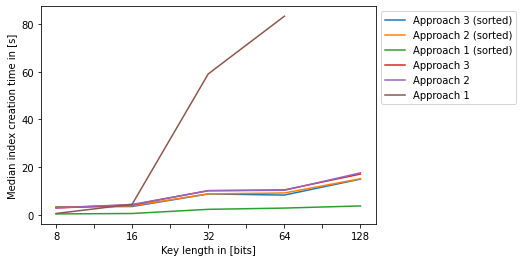

In [ ]:
# key length
con.execute("SELECT LIST(median) FROM bench_key_length WHERE sorted = 0 GROUP BY length")
not_sorted = con.fetchall()
con.execute("SELECT LIST(median) FROM bench_key_length WHERE sorted = 1 GROUP BY length")
sorted = con.fetchall()
# print(result)

groups = []
for i in range(5):
  group = sorted[i][0] + not_sorted[i][0]
  groups.append(group)

group_labels = ['8', '16', '32', '64', '128']

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 3 (sorted)", 1: "Approach 2 (sorted)", 2: "Approach 1 (sorted)", 3: "Approach 3", 4: "Approach 2", 5: "Approach 1"})

# title='Median index creation time for different integer types on uniform data, 128M keys'
ax = df.plot(y=[0, 1, 2, 3, 4, 5])
ax.set_xlabel("Key length in [bits]")
ax.set_ylabel("Median index creation time in [s]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Plot the thread benchmarks

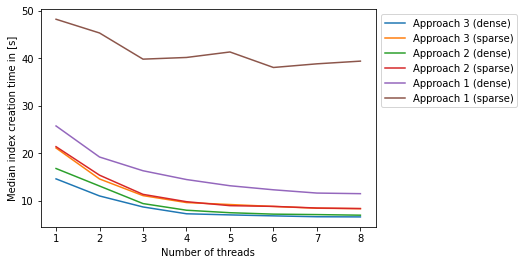

In [ ]:
# all threads (median)
con.execute("SELECT LIST(median) FROM bench_threads GROUP BY num_threads;")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row[0])

group_labels = ['1', '2', '3', '4', '5', '6', '7', '8']

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 3 (dense)", 1: "Approach 3 (sparse)", 2: "Approach 2 (dense)", 3: "Approach 2 (sparse)", 4: "Approach 1 (dense)", 5: "Approach 1 (sparse)"})

# , title='Median index creation time for 1 - 8 threads, 128M 64bit integer keys'
ax = df.plot(y=[0, 1, 2, 3, 4, 5])
ax.set_xlabel("Number of threads")
ax.set_ylabel("Median index creation time in [s]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

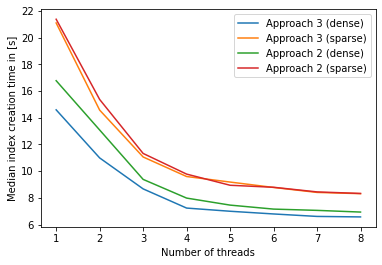

In [ ]:
# all threads (median)
con.execute("SELECT LIST(median) FROM bench_threads WHERE approach != 3 GROUP BY num_threads;")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row[0])

group_labels = ['1', '2', '3', '4', '5', '6', '7', '8']

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 3 (dense)", 1: "Approach 3 (sparse)", 2: "Approach 2 (dense)", 3: "Approach 2 (sparse)"})

# , title='Median index creation time for 1 - 8 threads, 128M 64bit integer keys'
ax = df.plot(y=[0, 1, 2, 3])
ax.set_xlabel("Number of threads")
ax.set_ylabel("Median index creation time in [s]")
plt.show()

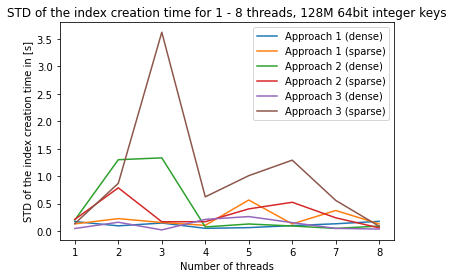

In [ ]:
# all threads (STD)
con.execute("SELECT LIST(std) FROM bench_threads GROUP BY num_threads")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row[0])

group_labels = ['1', '2', '3', '4', '5', '6', '7', '8']

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 1 (dense)", 1: "Approach 1 (sparse)", 2: "Approach 2 (dense)", 3: "Approach 2 (sparse)", 4: "Approach 3 (dense)", 5: "Approach 3 (sparse)"})

ax = df.plot(y=[0, 1, 2, 3, 4, 5], title='STD of the index creation time for 1 - 8 threads, 128M 64bit integer keys')
ax.set_xlabel("Number of threads")
ax.set_ylabel("STD of the index creation time in [s]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

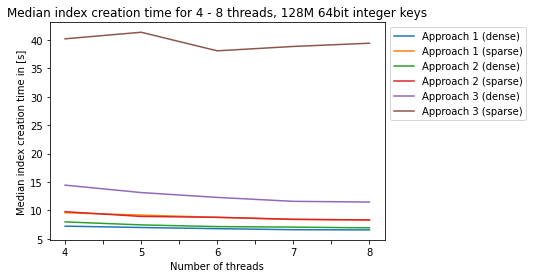

In [ ]:
# 4 - 8 threads (median)
con.execute("SELECT LIST(median) FROM bench_threads WHERE num_threads > 3 GROUP BY num_threads")
result = con.fetchall()

groups = []
for row in result:
  groups.append(row[0])

group_labels = ['4', '5', '6', '7', '8']

df = pd.DataFrame(groups, index=group_labels)
df = df.rename(columns={0: "Approach 1 (dense)", 1: "Approach 1 (sparse)", 2: "Approach 2 (dense)", 3: "Approach 2 (sparse)", 4: "Approach 3 (dense)", 5: "Approach 3 (sparse)"})

ax = df.plot(y=[0, 1, 2, 3, 4, 5], title='Median index creation time for 4 - 8 threads, 128M 64bit integer keys')
ax.set_xlabel("Number of threads")
ax.set_ylabel("Median index creation time in [s]")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Plot the string data set benchmarks

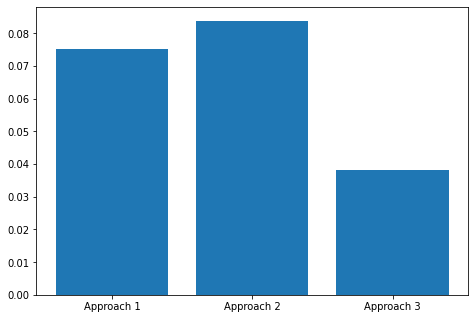

In [ ]:
# strings
con.execute("SELECT median FROM bench_strings WHERE data_set != 'wiki';")
result = con.fetchall()

# plot is pretty boring, all more or less the same run time
# probably better to just add it as a table

y = []
for row in result:
  y.append(row[0])

# group_labels = ['0.125', '0.25', '0.375', '0.5', '0.625', '0.75', '0.875', '1', '1.125', '1.25', '1.375', '1.5']

# df = pd.DataFrame(groups, index=group_labels)
# df = df.rename(columns={0: "Approach 1", 1: "Approach 2", 2: "Approach 3", 3: "Approach 4"})

# ax = df.plot(y=[0, 1, 2, 3], title='Median index creation time for different zipf parameters, 256M 64bit integer keys')
# ax.set_xlabel("Zipf parameter 1 + s")
# ax.set_ylabel("Median index creation time in [s]")
# plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Approach 1', 'Approach 2', 'Approach 3']
ax.bar(x, y)
plt.show()

# Plot old timings vs. new timings

In [ ]:
# compare old vs new
con.execute("SELECT name, LIST(median) FROM bench_old_new GROUP BY name")
result = con.fetchall()
print(result)

groups = []
for row in result:
  groups.append(row[1])

group_labels = ['CREATE INDEX 16M 64bit sparse', 'CREATE INDEX 16M 64bit dense', 'INSERT INTO PK 16M 64bit dense', 'INSERT INTO PK 16M 64bit sparse', 'Index Join 100k x 200k', 'CREATE INDEX ON wikipedia titles']

df = pd.DataFrame(groups, index=group_labels)
print(df)

[('CreateIdx16Msparse8T', [5.918, 1.382]), ('CreateIdx16Mdense8T', [3.78, 0.695]), ('CreateIdx16Mdense8TPK', [11.709, 5.5]), ('CreateIdx16Msparse8TPK', [14.529, 8.801]), ('IndexJoin', [0.358, 0.118]), ('CreateIdxWiki', [18.939, 12.379])]
                                       0       1
CREATE INDEX 16M 64bit sparse      5.918   1.382
CREATE INDEX 16M 64bit dense       3.780   0.695
INSERT INTO PK 16M 64bit dense    11.709   5.500
INSERT INTO PK 16M 64bit sparse   14.529   8.801
Index Join 100k x 200k             0.358   0.118
CREATE INDEX ON wikipedia titles  18.939  12.379
